In [1]:
import grid2op
from grid2op.PlotGrid import PlotMatplot
import numpy as np
from lightsim2grid import LightSimBackend
from grid2op.utils import EpisodeStatistics
import os

In [2]:
env = grid2op.make("educ_case14_storage_custom",
                    backend=LightSimBackend()
                    )

In [3]:
env.max_episode_duration()

288

In [4]:
env.chronics_handler.real_data.max_timestep()

288

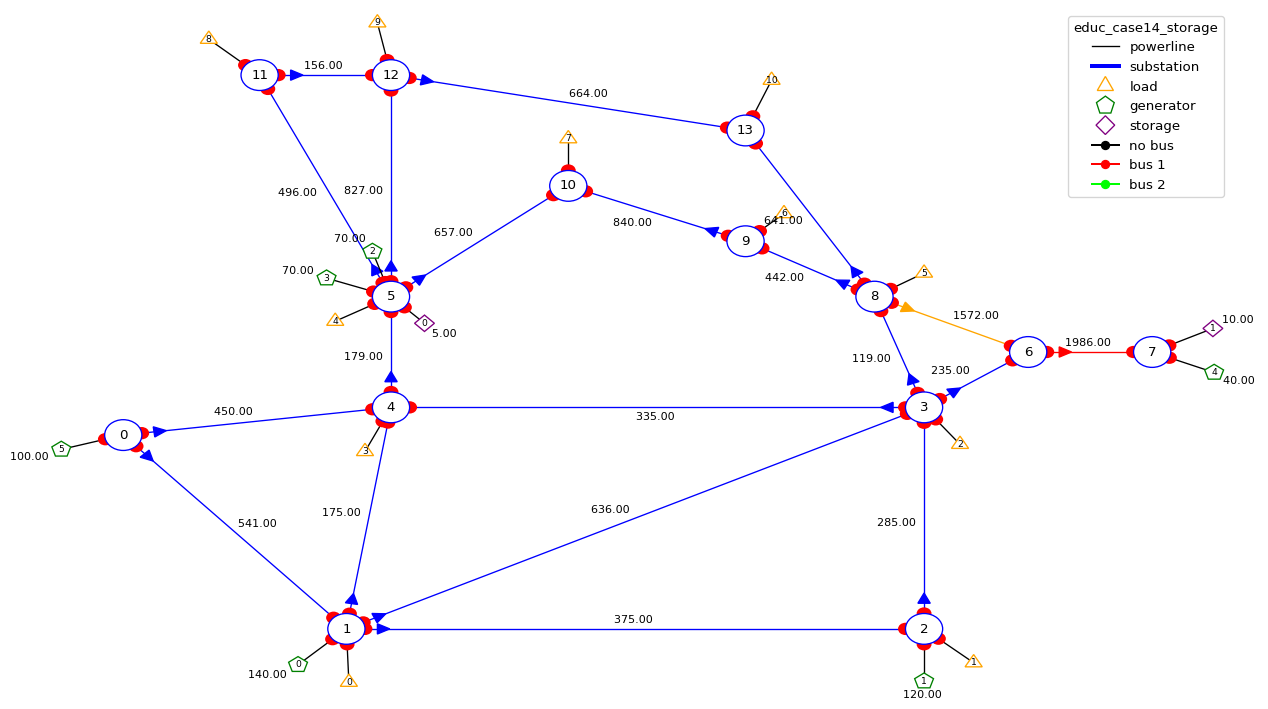

In [11]:
plot_helper = PlotMatplot(env.observation_space)
_ = plot_helper.plot_info(line_values=env._thermal_limit_a, coloring="line", gen_values=env.gen_pmax, storage_values=env.storage_max_p_prod)

In [12]:
stats_reco = EpisodeStatistics(env, name_stats="_reco_powerline")
stats_dn = EpisodeStatistics(env, name_stats="l2rpn_dn")
stats_dn.get("rho")

(array([[0.39992064, 0.4835422 , 0.35296488, ..., 0.4352135 , 0.5762258 ,
         0.4244097 ],
        [0.4093631 , 0.49545798, 0.3829106 , ..., 0.44902235, 0.589728  ,
         0.4245461 ],
        [0.40537944, 0.50419843, 0.4131158 , ..., 0.46889868, 0.5993527 ,
         0.4355195 ],
        ...,
        [0.4665199 , 0.5729448 , 0.7199635 , ..., 0.7114612 , 0.60905284,
         0.73859173],
        [0.47050735, 0.5827433 , 0.7404096 , ..., 0.7201158 , 0.6101445 ,
         0.74725765],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[ 0],
        [ 0],
        [ 0],
        ...,
        [68],
        [68],
        [68]]))

In [13]:
stats_dn.get_metadata()

{'agent_type': "<class 'grid2op.Agent.doNothing.DoNothingAgent'>",
 'agent_seeds': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'env_seeds': [224933033,
  369499290,
  219250107,
  1361544514,
  883910768,
  308197282,
  1974714076,
  1641486691,
  181582956,
  1605544720,
  56259925,
  792673618,
  2126033362,
  1557189083,
  778727145,
  1207915669,
  1804038711,
  2009939665,
  916134734,
  1804402948,
  718702441,
  1511291419,
  655871211,
  276184580,
  1152565312,
  946956883,
  262964322,
  67117281,
  68733439,
  56093347,
  1661467601,
  1895038740,
  2101956523,
  333573436,
  361086138,
  1449029547,
  1133079604,
  1635293811,
  1946434646,
  49941158,
  1667239954,
  184522402

In [48]:
env.observation_space.gen_renewable, env.observation_space.storage_max_p_absorb, env.observation_space.storage_max_p_prod

(array([False, False,  True,  True,  True, False]),
 array([ 5., 10.], dtype=float32),
 array([ 5., 10.], dtype=float32))

In [47]:
obs = env.reset()
obs, reward, done, info = env.step(env.action_space({"curtail": [(2, 1), (3, 0.5)], "set_storage":[(0, -5)]}))
# obs, reward, done, info = env.step(env.action_space())
obs, info

(<grid2op.Space.GridObjects.CompleteObservation_educ_case14_storage_custom at 0x7f0f265f9e50>,
 {'disc_lines': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1], dtype=int32),
  'is_illegal': False,
  'is_ambiguous': False,
  'is_dispatching_illegal': False,
  'is_illegal_reco': False,
  'reason_alarm_illegal': None,
  'opponent_attack_line': None,
  'opponent_attack_sub': None,
  'opponent_attack_duration': 0,
  'exception': [],
  'rewards': {}})

In [60]:
print(env.action_space({"curtail": [(2, 1), (3, 0.5)], "set_storage":[(0, -5)]}).as_dict())

{'storage_power': array([-5.,  0.], dtype=float32), 'curtailment': array([-1. , -1. ,  1. ,  0.5, -1. , -1. ], dtype=float32)}


In [35]:
obs.curtailment_limit, obs.storage_power

(array([1. , 1. , 1. , 0.5, 1. , 1. ], dtype=float32),
 array([0., 0.], dtype=float32))

In [89]:
sum([getattr(obs, attr_name).shape[0] for attr_name in ["gen_p", "load_p", 
                                      "p_or", "rho", "timestep_overflow", "line_status",
                                      # dispatch part of the observation
                                      "actual_dispatch", "target_dispatch",
                                      # storage part of the observation
                                      "storage_charge", "storage_power",
                                      # curtailment part of the observation
                                      "curtailment", "curtailment_limit",  "gen_p_before_curtail",
                                     ]])+4

135

In [6]:
from run_trained_agents import get_agent

path_agents = "./saved_model/expe_case_14/expe_hp/"
machine_dir = "GymEnvWithRecoDNShuffle14_rewgp_bs2"
name = "GymEnvWithRecoDNShuffle14_rewgp_bs2_20221110_192525_batch_size_2"
training_iter = 1_000_000

root_dir = os.path.abspath(path_agents)
submission_dir  = os.path.join(root_dir, machine_dir)
agent_dir = os.path.join(submission_dir, name)
weights_dir = os.path.join(agent_dir, f"{name}_{training_iter}_steps.zip")

agent = get_agent(submission_dir,
                                agent_dir,
                                weights_dir,
                                env,
                                0.2,
                                60)

agent

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [7]:
print(env.chronics_handler.get_name())

obs = env.reset()
reward = 0
done = False

while not done:
    act = agent.act(obs, reward, done)
    obs, rew, done, info = env.step(act)
    if info["is_ambiguous"] or info["is_illegal"] :
        print("AMBIGUOUS ACTION !!!!!!!!!!!!!!!", info)
    print("storate action:", act.as_dict()["storage_power"])
    print("curtailment action:", act.as_dict()["curtailment"])
    print("obs info:", obs.storage_power, obs.curtailment_limit)
   
    

2019-01-13
storate action: [0. 0.]
curtailment action: [-1.         -1.          0.6032208   0.21583293  0.08434812 -1.        ]
obs info: [0. 0.] [1.         1.         0.6032208  0.21583293 0.08434812 1.        ]
storate action: [0. 0.]
curtailment action: [-1.         -1.          0.60037166  0.21461447  0.08396451 -1.        ]
obs info: [0. 0.] [1.         1.         0.60037166 0.21461447 0.08396451 1.        ]
storate action: [0. 0.]
curtailment action: [-1.         -1.          0.59950864  0.21431945  0.08390141 -1.        ]
obs info: [0. 0.] [1.         1.         0.59950864 0.21431945 0.08390141 1.        ]
storate action: [0. 0.]
curtailment action: [-1.         -1.          0.60080564  0.21482682  0.08406904 -1.        ]
obs info: [0. 0.] [1.         1.         0.60080564 0.21482682 0.08406904 1.        ]
storate action: [0. 0.]
curtailment action: [-1.         -1.          0.60111976  0.21492708  0.08409377 -1.        ]
obs info: [0. 0.] [1.         1.         0.60111976 0.2

In [121]:
info

{'disc_lines': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1], dtype=int32),
 'is_illegal': False,
 'is_ambiguous': False,
 'is_dispatching_illegal': False,
 'is_illegal_reco': False,
 'reason_alarm_illegal': None,
 'opponent_attack_line': None,
 'opponent_attack_sub': None,
 'opponent_attack_duration': 0,
 'exception': [],
 'rewards': {}}

In [102]:
# agent.l2rpn_agent.nn_model.policy
agent.l2rpn_agent.nn_model.action_space.dict_properties

{'set_line_status': (array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1], dtype=int32),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        dtype=int32),
  (20,),
  numpy.int32),
 'change_line_status': (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=int32),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        dtype=int32),
  (20,),
  numpy.int32),
 'set_bus': (array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32),
  (

In [4]:
for name, weight in agent.l2rpn_agent.nn_model.policy.named_parameters():
    print(name, weight)

log_std Parameter containing:
tensor([-0.0071,  0.0016,  0.0008, -0.0007, -0.0046], device='cuda:0',
       requires_grad=True)
mlp_extractor.shared_net.0.weight Parameter containing:
tensor([[ 0.0592,  0.1159,  0.0545,  ..., -0.0113, -0.0114, -0.1133],
        [-0.0111,  0.0437,  0.0131,  ..., -0.0539, -0.0499, -0.0901],
        [ 0.1623,  0.0137,  0.0366,  ..., -0.1071,  0.0791,  0.0418],
        ...,
        [ 0.0183,  0.1312, -0.0176,  ..., -0.0227,  0.0200,  0.0610],
        [ 0.0723,  0.0984, -0.0725,  ..., -0.0257, -0.0522,  0.1866],
        [ 0.0164, -0.0261,  0.0673,  ..., -0.0147,  0.0453,  0.0015]],
       device='cuda:0', requires_grad=True)
mlp_extractor.shared_net.0.bias Parameter containing:
tensor([-1.0582e-02,  1.0005e-03,  1.1263e-02,  9.2413e-03,  2.3841e-03,
        -3.9605e-03, -3.3353e-04, -2.0337e-02,  2.5985e-03, -8.1719e-04,
         5.4805e-03,  5.7216e-03,  8.1322e-03,  5.1222e-04, -3.5111e-03,
        -7.0870e-03, -5.7130e-03,  1.2621e-02, -1.0997e-02, -3.22

## Test with OptimCVX agent

In [4]:
# import os
from l2rpn_baselines.OptimCVXPY import OptimCVXPY
from grid2op.utils import ScoreL2RPN2022
from grid2op.Parameters import Parameters
from utils import *
# from tqdm import tqdm
# import pdb
# import re
# import copy
# from datetime import datetime
# import torch

2022-11-08 11:39:58.064882: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-08 11:39:58.064904: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/boguslawskieva/miniconda3/envs/baselines_dev/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
ENV_NAME = "educ_case14_storage_custom"
SCOREUSED = ScoreL2RPN2022
verbose = True
p = Parameters()
p.LIMIT_INFEASIBLE_CURTAILMENT_STORAGE_ACTION = False
train_args = {}
train_args["gymenv_kwargs"] = {"safe_max_rho": 0.2}
nb_scenario = 7

In [6]:
env = grid2op.make(ENV_NAME,
                    backend=LightSimBackend(),
                    param=p
                    )

In [18]:
agent = OptimCVXPY(env.action_space,
                   env,
                   penalty_redispatching_unsafe=100,
                   penalty_redispatching_safe=100,
                   penalty_storage_unsafe=0.01,
                   penalty_curtailment_unsafe=0.01,
                   rho_safe=0.2,
                   rho_danger=0.8,
                   margin_th_limit=0.93,
                   alpha_por_error=0.5,
                   weight_redisp_target=0.3)

In [19]:
results = eval_agent(ENV_NAME,
                nb_scenario,
                "agent_optim",
                "load_path",
                SCOREUSED,
                verbose,
                gymenv_kwargs=train_args["gymenv_kwargs"],
                param=p,
                my_agent=agent
                )
results

Starts the evaluation of the agent
Start the evaluation of the scores


([288, 288, 227, 227, 288, 233, 95],
 array([288, 288, 220,  90, 236, 234,  86]),
 array([288, 288, 220,  90, 236, 234,  86]))